## Imports

In [1]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras

## Hyperparameters

In [2]:
IMG_HEIGHT = 256
IMG_WIDTH = 256

# Dataset directory
dataset_path = os.environ['DATASET_PATH']
directory_path = pathlib.Path(dataset_path)

## Load the Model

In [3]:
# Load the model
model = keras.models.load_model(os.path.join(os.environ['MODELS_PATH'], 'model.h5'))

In [4]:
# The class names for the model
class_names = ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
print(class_names)

['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


In [18]:
# Take in an image and use the model to predict the class of the image
def predict_image(image_path):
    img = keras.preprocessing.image.load_img(
        image_path, target_size=(IMG_HEIGHT, IMG_WIDTH)
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        f'This image most likely belongs to {class_names[np.argmax(score)]} with a {100 * np.max(score)} percent confidence.'
    )

    # Show all of the confidence scores
    for i in range(len(class_names)):
        print(f'{class_names[i]}: {100 * score[i]}')


    plt.imshow(img)
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 16ms/step
This image most likely belongs to elephant with a 99.61569905281067 percent confidence.
butterfly: 0.0007866609958000481
cat: 9.20234015211463e-06
chicken: 0.00014984063454903662
cow: 1.1881096497745602e-06
dog: 5.3427594792765376e-08
elephant: 99.6156997680664
horse: 2.0215552842817175e-10
sheep: 0.3833365738391876
spider: 6.9776028794876765e-06
squirrel: 3.0606456675741356e-06


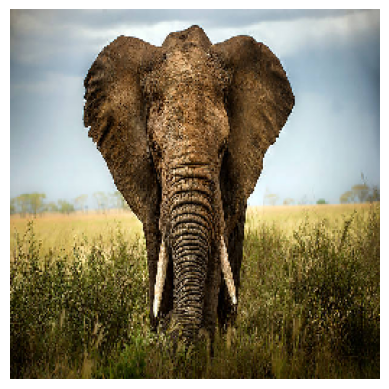

In [25]:
predict_image(os.path.join(os.environ['TEST_IMG_PATH'], 'elephant.jpg'))